<a href="https://colab.research.google.com/github/Createunknowntech/Employee_Attrition_Problem/blob/main/Project_1(Employee_Attrition_Problem).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project -1**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount("https://drive.google.com/?authuser=0")

MessageError: Error: credential propagation was unsuccessful

In [ ]:
train_data=pd.read_csv('/content/train_dataset.csv')
train_data_salaries=pd.read_csv('/content/train_salaries.csv')
test_data=pd.read_csv('/content/test_dataset.csv')

In [ ]:
train_data.head()

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,CFO,MASTERS,MATH,HEALTH,10.0,83.0,130.0
1,CEO,HIGH_SCHOOL,NONE,WEB,3.0,73.0,101.0
2,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10.0,38.0,137.0
3,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8.0,17.0,142.0
4,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8.0,16.0,163.0


In [ ]:
train_data_salaries.head()

,jobId,salary
0,JOB1362684407687,130.0
1,JOB1362684407688,101.0
2,JOB1362684407689,137.0
3,JOB1362684407690,142.0
4,JOB1362684407691,163.0


In [ ]:
test_data.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22.0,73.0
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20.0,47.0
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17.0,9.0
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14.0,96.0
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10.0,44.0


In [ ]:
#Merging train_data and train_data_salaries:
train_data=pd.merge(train_data,train_data_salaries,on='jobId')

In [ ]:
train_data.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [ ]:
#Filter salaries<30 as less then 30 salary with these qualificatios is not accepted:
train_data=train_data[train_data['salary']>30]

In [ ]:
train_data.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis', 'salary'],
      dtype='object')

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 997548 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   jobId                997548 non-null  object
 1   companyId            997548 non-null  object
 2   jobType              997548 non-null  object
 3   degree               997548 non-null  object
 4   major                997548 non-null  object
 5   industry             997548 non-null  object
 6   yearsExperience      997548 non-null  int64 
 7   milesFromMetropolis  997548 non-null  int64 
 8   salary               997548 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 76.1+ MB


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [ ]:
train_data.describe()

,yearsExperience,milesFromMetropolis,salary
count,997548.000000,997548.000000,997548.000000
mean,12.015214,49.458372,116.280462
std,7.204992,28.863518,38.512936
min,0.000000,0.000000,31.000000
25%,6.000000,24.000000,89.000000
50%,12.000000,49.000000,114.000000
75%,18.000000,74.000000,141.000000
max,24.000000,99.000000,301.000000


In [ ]:
test_data.describe()

,yearsExperience,milesFromMetropolis
count,1000000.000000,1000000.000000
mean,12.002104,49.526414
std,7.213179,28.889713
min,0.000000,0.000000
25%,6.000000,25.000000
50%,12.000000,50.000000
75%,18.000000,75.000000
max,24.000000,99.000000


In [ ]:
#Get Total number of samples for dataset:
print('train data length:',len(train_data))
print('test data length:',len(test_data))

train data length: 997548
test data length: 1000000


In [ ]:
#Get unique values:train_data
for x in train_data.columns:
  print(x,':',len(train_data[x].unique()))

jobId : 997548
companyId : 63
jobType : 8
degree : 5
major : 9
industry : 7
yearsExperience : 25
milesFromMetropolis : 100
salary : 265


In [ ]:
#Get unique values:test_data
for x in test_data.columns:
  print(x,':',len(test_data[x].unique()))

jobId : 1000000
companyId : 63
jobType : 8
degree : 5
major : 9
industry : 7
yearsExperience : 25
milesFromMetropolis : 100


In [ ]:
#Counting missing values:
print("Missing values for train_data:\n",train_data.isnull().sum())
print("Missing values for test_data:\n",test_data.isnull().sum())

Missing values for train_data:
 jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
salary                 0
dtype: int64
Missing values for test_data:
 jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64


In [ ]:
#Removing 'jobId' and 'compayId' as it does not play any major role in predictin salaries:
train_data=train_data.drop(['jobId','companyId'],axis=1)
test_data=test_data.drop(['jobId','companyId'],axis=1)

In [ ]:
#Separating as categorical and var list:
categorical_list=[]
var_list=[]
#looping all aroung the columns for differencing:
for x in train_data.columns:
  if train_data[x].dtype=='object':
    categorical_list.append(x)
  elif train_data[x].dtype=='int64':
    var_list.append(x)
  elif train_data[x].dtype=='float64':
    var_list.append(x)

In [ ]:
corr=train_data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

ValueError: could not convert string to float: 'CFO'

# *Chi-Square Test:*

In [ ]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [ ]:
def perform_chi_square_test(var_1,var_2):
  contingency_table=pd.crosstab(train_data[var_1],train_data[var_2])
  observed_values=contingency_table.values
  b=cchi2_contingency(contingency_table)
  excepted_values=b[3]
  #degree of freedom:
  no_of_rows=len(contingency_table.iloc[0:,0])
  no_of_columns=len(contingency_table.iloc[0,0:])
  deg_f=(no_of_rows-1)*(no_of_columns-1)
  print("Degree of Freedom:",degreef)
  #Significance level 5%:
  alpha=0.05
  print("significance level:",alpha)
  #chi-square ststistic:
  chi_square=sum([(o-e)**2./e for o,e in zip(observed_values,expected_values)])
  chi_square_statistic=chi_square[0]+chi_square[1]
  print("chi_square statistic:",chi_square_statistic)
  #critical value:
  critical_value=chi2.ppf(q=1-alpha,df=degree_f)
  print('critical_value:',critical_value)
  #p - value:
  p_value=1-chi2.cdf(x=chi_square_statistic,df=degree_f)
  print('p_value:',p_value)
  if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
  else:
    print("Reject H0,There is a no relationship between 2 categorical variables")
  if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
  else:
    print("Reject H0,There is no relationship between 2 categorical variables")

In [ ]:
for x in categorical_list:
  for i in categorical_list:
    if i!=x:
      print('chi-square test on:',x,'',i,'\n')
      perform_chi_square_test(x,i)
      print('-------------------------------------\n')

chi-square test on: jobType  degree 



NameError: name 'cchi2_contingency' is not defined

# **Visualization :**

In [ ]:
def scatter_plot(x,y):
  plt.figure()
  plt.xlabel(x)
  plt.ylabel(y)
  plt.scatter(train_data[x],train_data[y])
  plt.show()

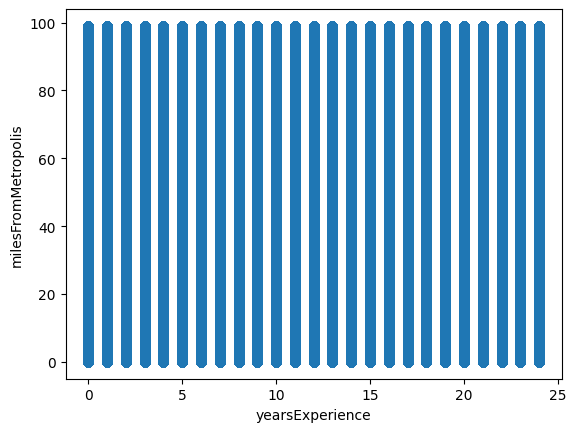

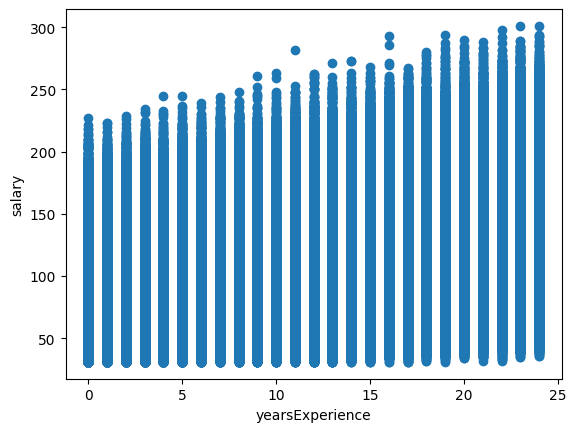

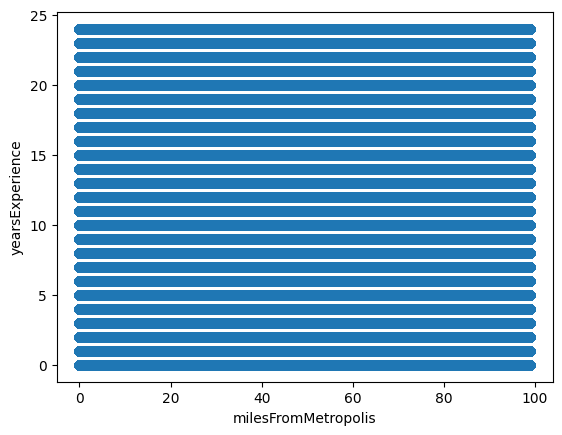

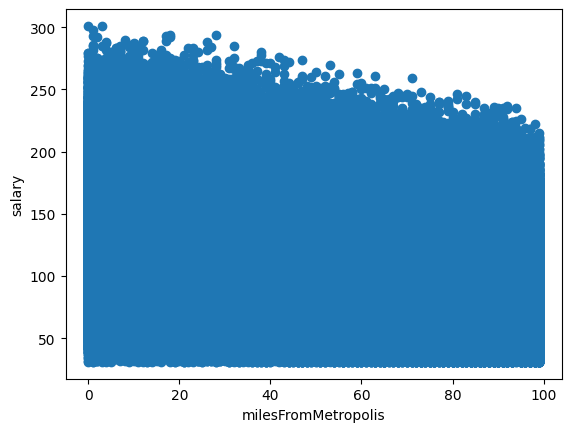

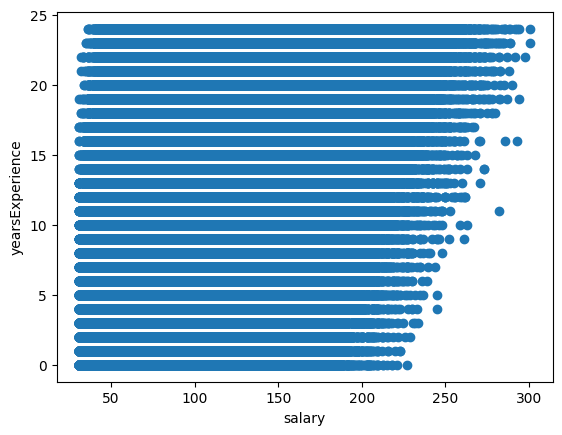

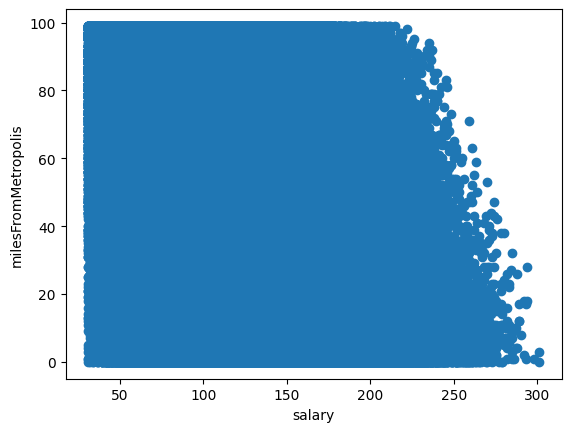

In [ ]:
#looping through various columns:
for i in var_list:
  for j in var_list:
    if i!=j:
      scatter_plot(i,j)

array([[<Axes: title={'center': 'yearsExperience'}>,
        <Axes: title={'center': 'milesFromMetropolis'}>],
       [<Axes: title={'center': 'salary'}>, <Axes: >]], dtype=object)

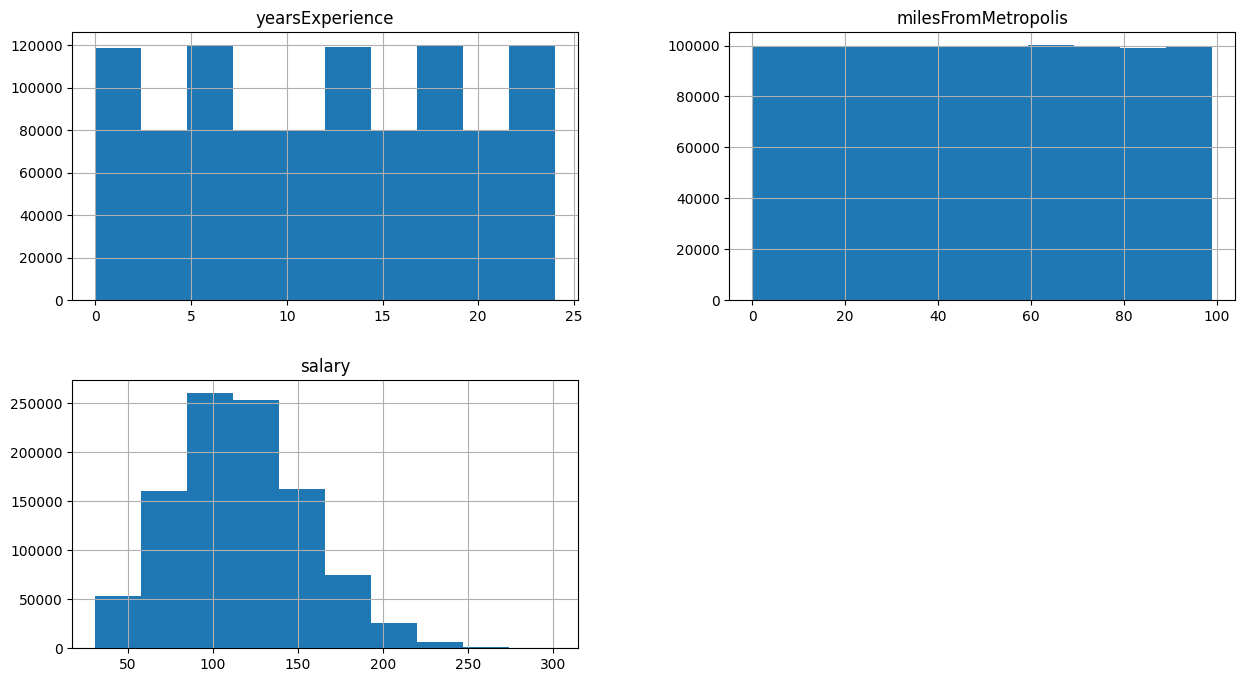

In [ ]:
#Histogram:
train_data.hist(figsize=(15,8))

<Axes: >

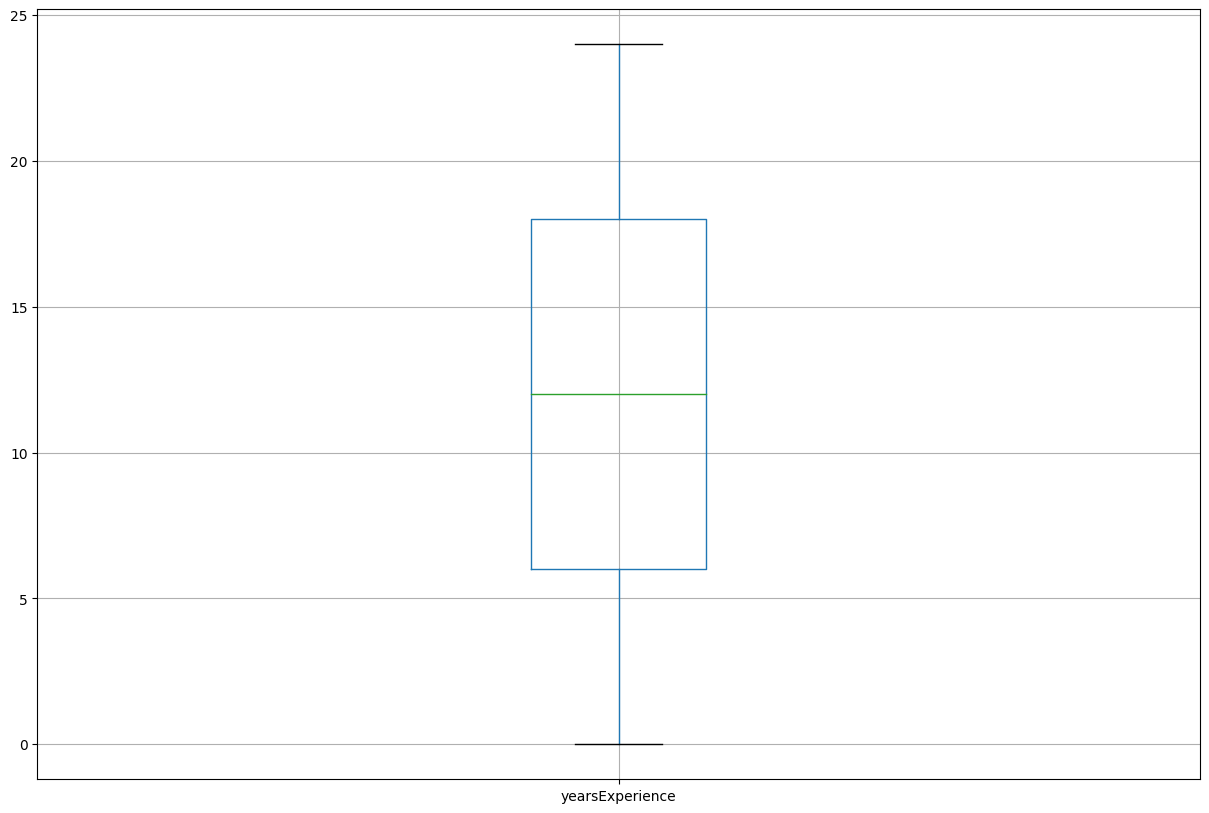

In [ ]:
#Box-plot:
train_data.boxplot(column='yearsExperience',figsize=(15,10))

<Axes: >

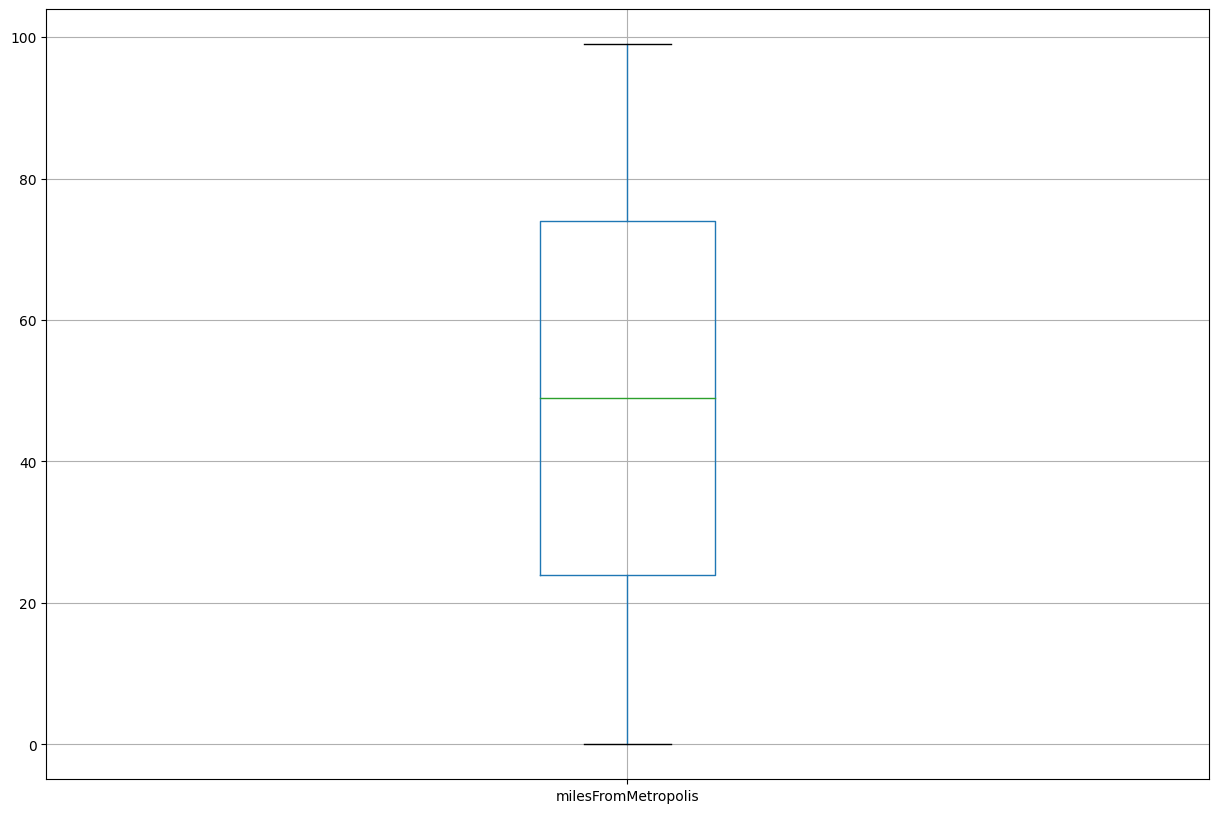

In [ ]:
train_data.boxplot(column='milesFromMetropolis',figsize=(15,10))

<Axes: >

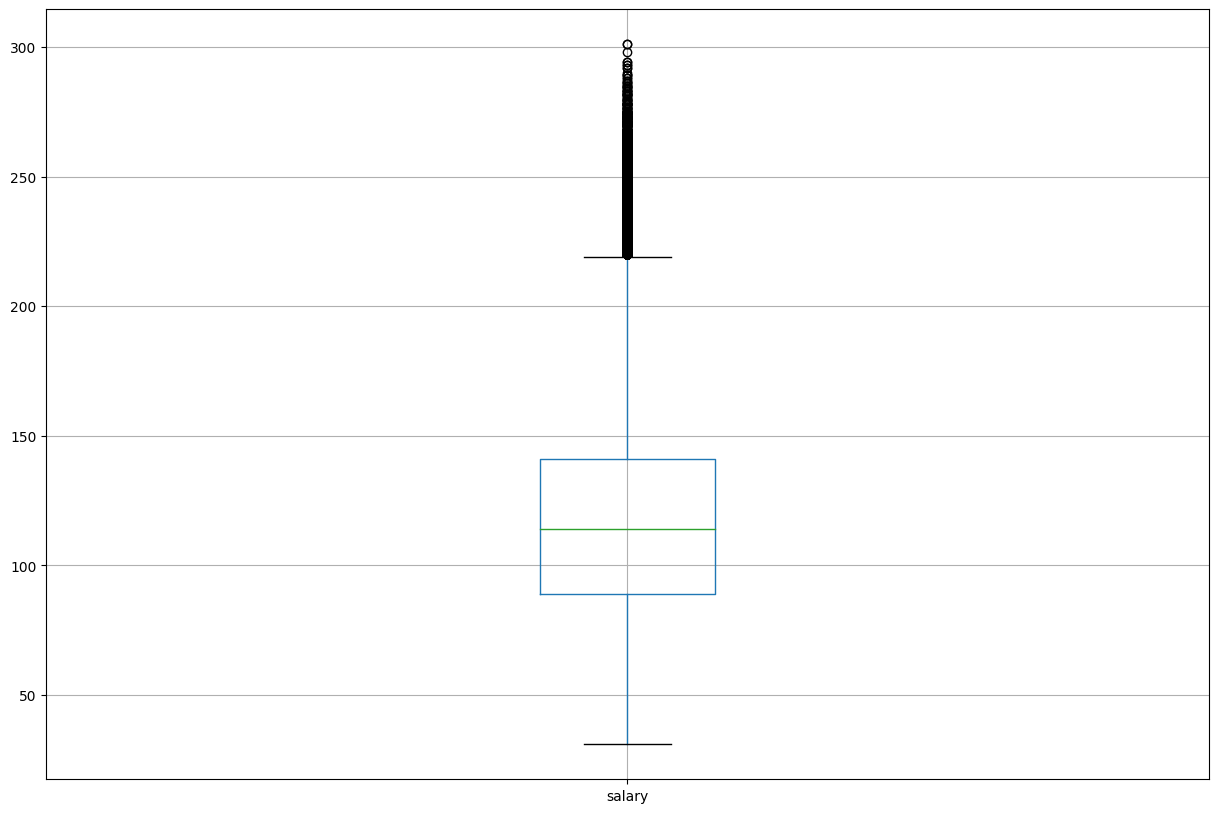

In [ ]:
train_data.boxplot(column='salary',figsize=(15,10))

<Axes: xlabel='yearsExperience', ylabel='salary'>

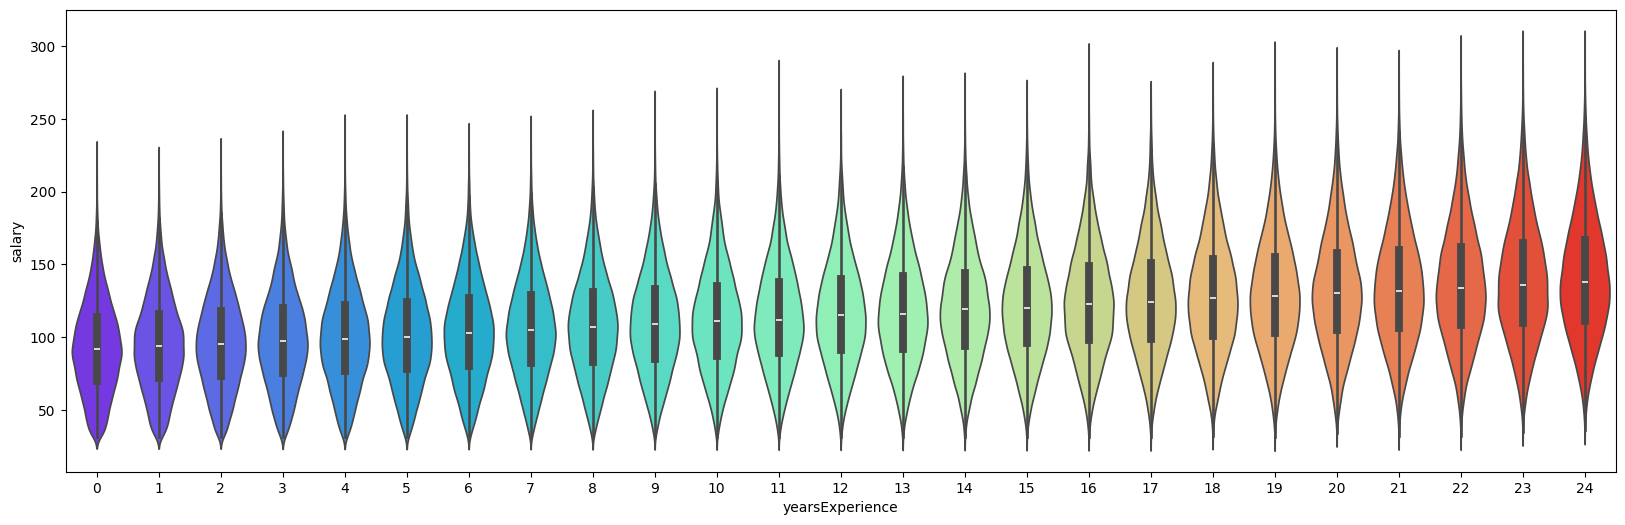

In [ ]:
#Violin Plot:
plt.figure(figsize=(20,6))
sns.violinplot(x='yearsExperience',y='salary',data=train_data,palette='rainbow')

<Axes: xlabel='milesFromMetropolis', ylabel='salary'>

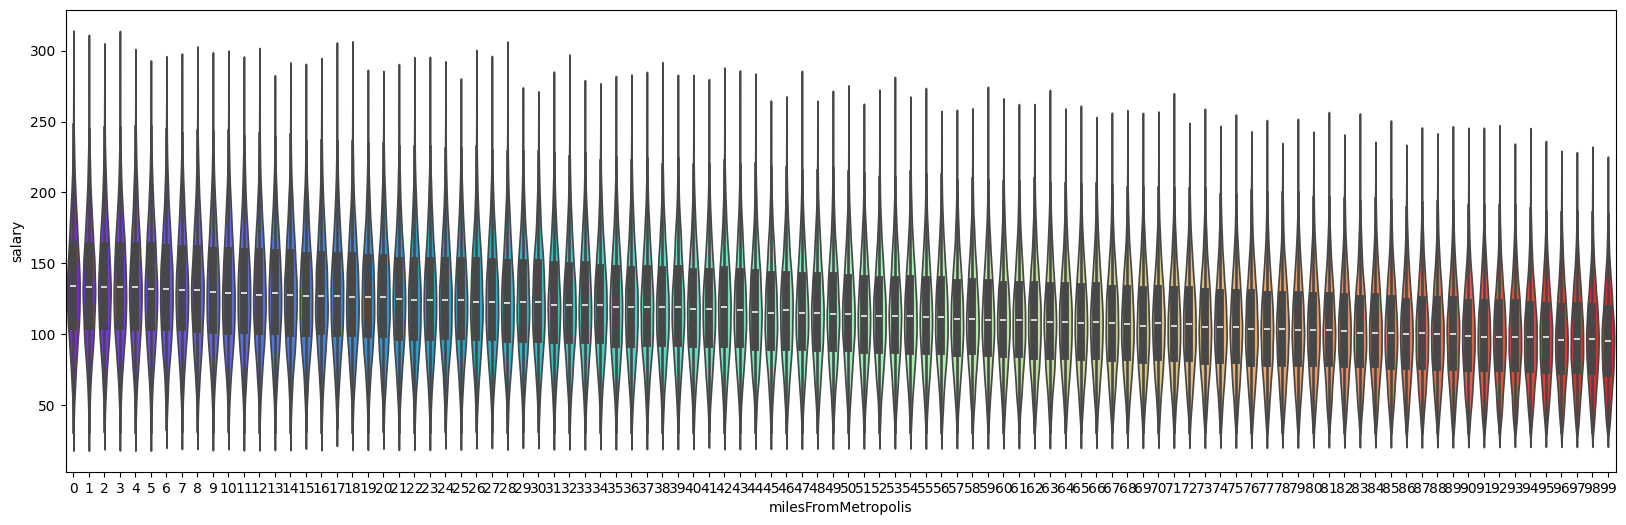

In [ ]:
plt.figure(figsize=(20,6))
sns.violinplot(x='milesFromMetropolis',y='salary',data=train_data,palette='rainbow')

<Axes: xlabel='yearsExperience', ylabel='salary'>

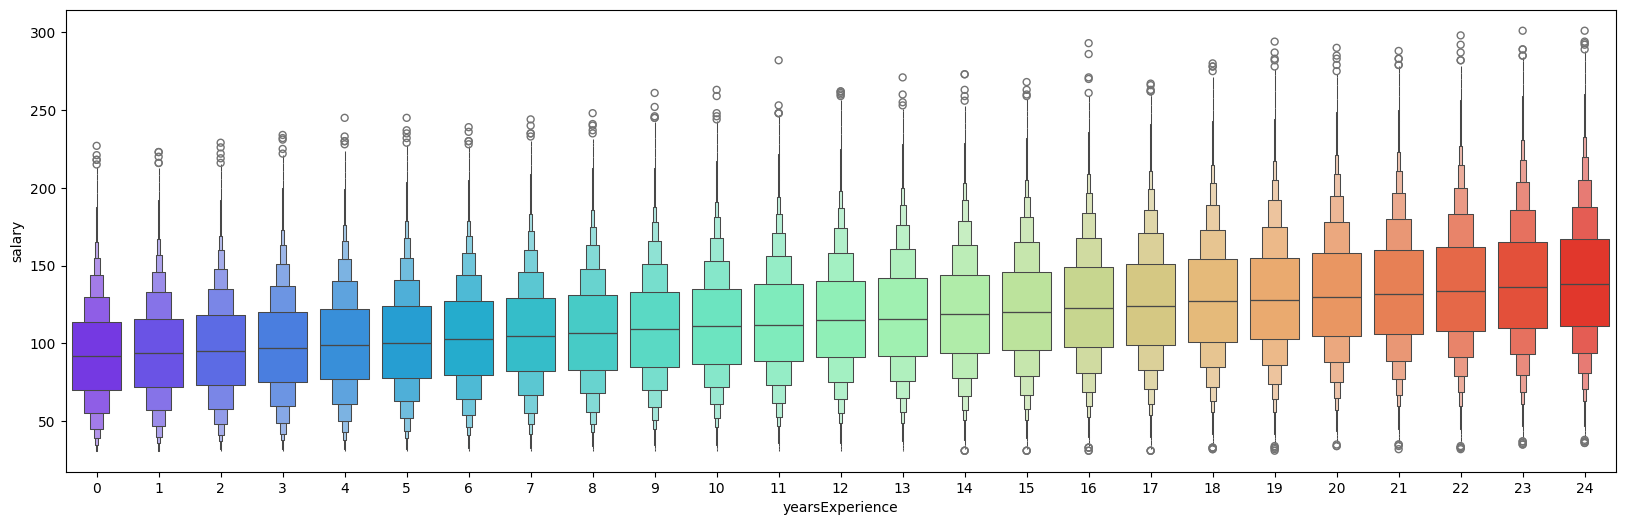

In [ ]:
#boxen-plot:
plt.figure(figsize=(20,6))
sns.boxenplot(x='yearsExperience',y='salary',data=train_data,palette='rainbow')

<Axes: xlabel='yearsExperience', ylabel='count'>

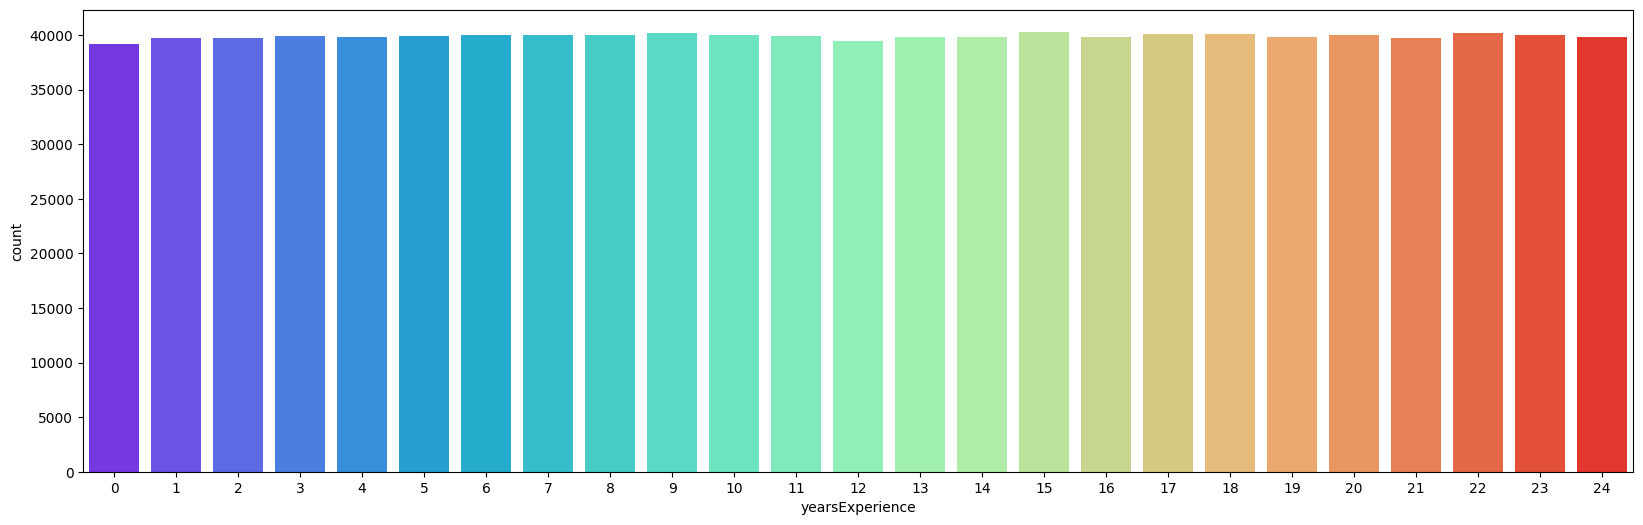

In [ ]:
#count-plot:
plt.figure(figsize=(20,6))
sns.countplot(x='yearsExperience',data=train_data,palette='rainbow')

In [ ]:
#variance Inflation Factor:
import statsmodel.api as sm
train_for_vif=train_data.drop(['jobType', 'degree', 'major', 'industry', 'salary'],axis=1)
target=train_data['salary']
names=['yearsExperience','milesFromMetropolis']
train_for_vif.dropna(inplace=True)
names

In [ ]:
#calculating vif for each feature:
for i in range(0,len(names)):
  y=train_for_vif.loc[:,train_for_vif.columns==names[i]]
  x=train_for_vif.loc[:,train_for_vif.columns!=names[i]]

In [ ]:
#fitting OLS model:
model=sm.OLS(y,x)
results=model.fit()
rsq=results.rsquared
vif=round(1/(1-rsq),2)
print("R squared value of { } column is { }keeping all other columns as features".format(names[i],(round(rsq,2))))
print("Variance Inflation Factor of { } columns is {}\n".format(names[i],vif))